## 단일 변수 시각화 

In [39]:
import pandas as pd 
data_df = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
data_df.head()

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


In [40]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [41]:
import seaborn as sns

### 단일 변수


#### 수치형 
- 히스토그램 : 확률밀도분포 같이 작성 가능
- boxplot : IQR 4분위 표시

In [42]:
# data_df.describe()
data_df.describe().columns

Index(['id', 'Term', 'amount', 'overdue_count', 'credit rating', 'age',
       'Mileage'],
      dtype='object')

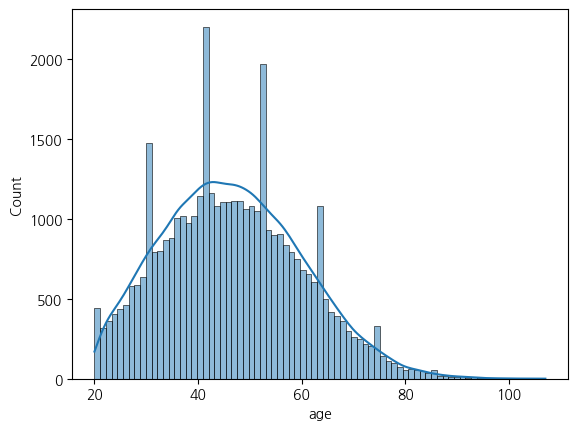

In [43]:
sns.histplot(data=data_df, x='age', kde=True)
# kde = kernel density estimation
plt.show()

<Axes: xlabel='amount'>

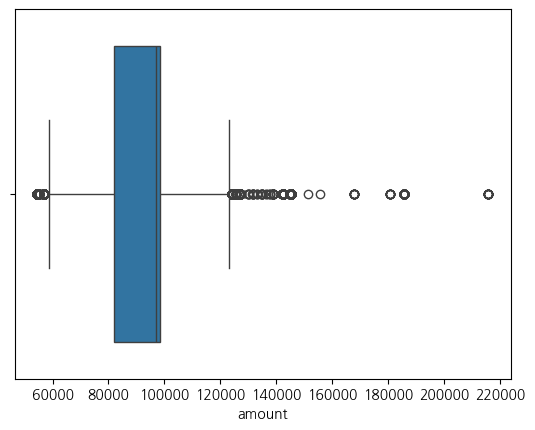

In [44]:
sns.boxplot(data=data_df, x='amount')


#### 확률 밀도 (kdeplot)

<Axes: xlabel='age', ylabel='Density'>

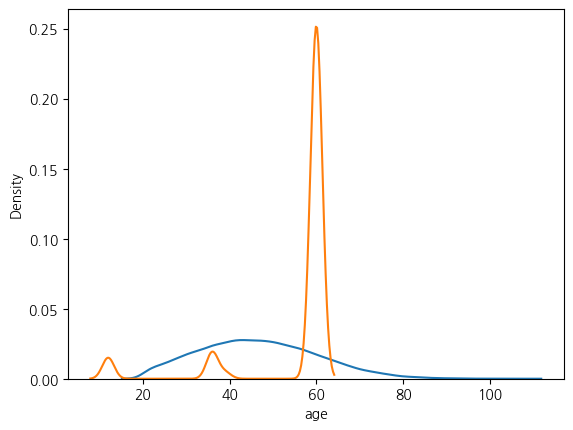

In [57]:
sns.kdeplot(data=data_df['age'])
sns.kdeplot(data=data_df['Term'])

### 범주형

In [45]:
data_df.describe(include='object')
data_df.describe(include='object').columns

Index(['type_of_contract', 'type_of_contract2', 'channel', 'datetime',
       'payment_type', 'product', 'state', 'overdue', 'bank', 'cancellation'],
      dtype='object')

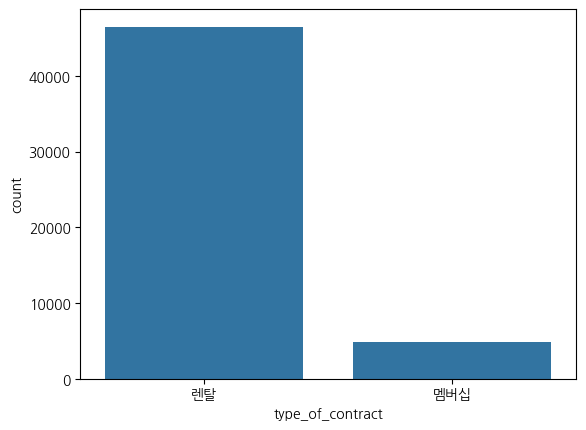

In [46]:
sns.countplot(data=data_df,x='type_of_contract')
plt.show()

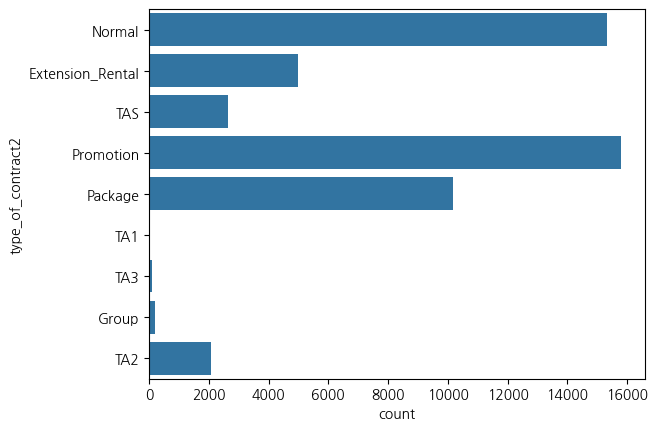

In [47]:
sns.countplot(data=data_df,y='type_of_contract2')
plt.show()

#### 연습 문제
- 은행중 거래가 가장 많은 은행 표시 

In [48]:
data_df['bank'].value_counts() # 빈도수 그리기 

bank
국민은행         9901
롯데카드         9518
농협은행         6278
신한은행         3522
우리은행         3386
기업은행         1963
신한카드         1533
하나은행         1446
국민카드         1311
BC카드         1264
새마을금고         964
부산은행          888
삼성카드          884
현대카드          876
대구은행          746
우체국           717
외환은행          586
외환카드          530
경남은행          442
SC제일은행        439
광주은행          347
신협중앙회         341
전북은행          195
씨티은행          162
수협중앙회         160
제주은행           40
유안타증권          27
산업은행           23
현대증권           11
삼성증권            7
하나SK            6
미래에셋증권          5
신한금융투자          4
NH농협카드          4
한국투자증권          4
우리카드            3
대우증권            2
상호저축은행          1
대신증권            1
SK증권            1
하나대투증권          1
산림조합중앙회         1
수협카드            1
메리츠종합금융증권       1
하이투자증권          1
씨티카드            1
Name: count, dtype: int64

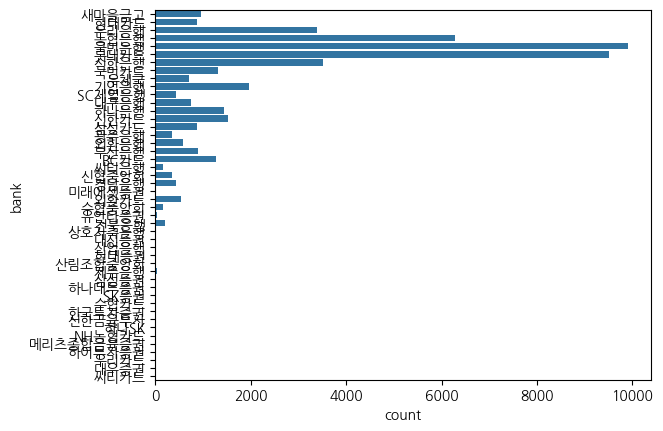

In [49]:
sns.countplot(data=data_df,y='bank')
plt.show()

#### quest 
- 상위 거래 가장 많은 상위 5위 만 표시
- 거래가 가장 적은 하위 5위만 표시 

In [50]:
data_df['bank'].value_counts()[:5]

bank
국민은행    9901
롯데카드    9518
농협은행    6278
신한은행    3522
우리은행    3386
Name: count, dtype: int64

<Axes: xlabel='bank', ylabel='count'>

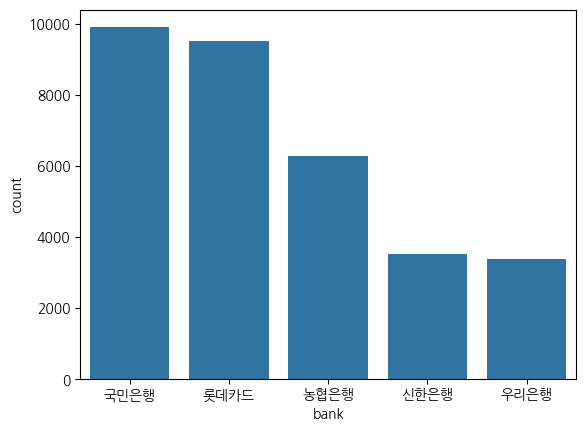

In [51]:
# 방법 3: DataFrame으로 직접 변환
plot_df = pd.DataFrame({
    'bank': data_df['bank'].value_counts()[:5].index,
    'count': data_df['bank'].value_counts()[:5].values
})
sns.barplot(data=plot_df, x='bank', y='count')

<Axes: xlabel='bank', ylabel='count'>

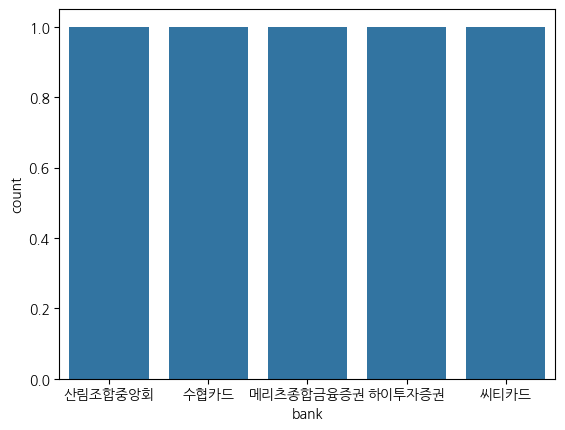

In [52]:
# 방법 3: DataFrame으로 직접 변환
plot_df = pd.DataFrame({
    'bank': data_df['bank'].value_counts()[-5:].index,
    'count': data_df['bank'].value_counts()[-5:].values
})
sns.barplot(data=plot_df, x='bank', y='count')